In [373]:
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
import selenium.webdriver
import pandas as pd
import re
import networkx as nx
%matplotlib inline

In [386]:
myProxy = '70.166.167.36:4145'

ip, port = myProxy.split(":")
driver = webdriver.FirefoxProfile()
driver.set_preference('network.proxy.type', 1)
driver.set_preference('network.proxy.socks', ip)
driver.set_preference('network.proxy.socks_port', int(port))

In [387]:
#open connection Tor Browser
binary = FirefoxBinary('/Applications/Tor Browser.app/Contents/MacOS/firefox')
driver = webdriver.Firefox(firefox_binary = binary)

In [388]:
# creating empty df and network
df = pd.DataFrame(columns = ['Link', 'Name']) 
G = nx.DiGraph()

In [389]:
#go to url and add the link to database and network
url = 'http://wiki5kauuihowqi5.onion/'
df.loc[0] = [url, 'Hidden Wiki']
G.add_node(url)
driver.get(url)

                             Link         Name
0  http://wiki5kauuihowqi5.onion/  Hidden Wiki


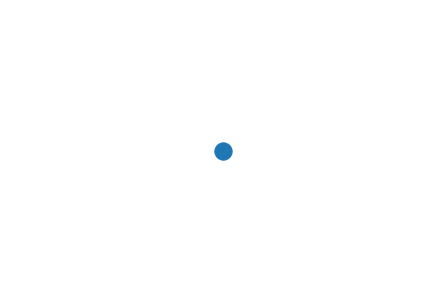

In [390]:
print(df)
#nx.draw(G, with_labels=True)
nx.draw(G)

In [391]:
def main_domain(url):
    #from tld import get_tld
    #res = get_tld(url, as_object=True) #Get the root as an object
    #return 'https://' + res.fld
    from urllib.parse import urlparse
    parsed_uri = urlparse(url)
    result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
    return result

In [392]:
def get_links():
    # identify elements with tagname <a>
    lnks=driver.find_elements_by_tag_name('a')
    # traverse list
    df_links = pd.DataFrame(columns = ['Link', 'Name'])
    for lnk in lnks:
        loc = len(df_links)
        main_lnk = main_domain(lnk.get_attribute('href'))
        df_links.loc[loc] = [main_lnk, lnk.text]
        G.add_node(main_lnk)
        G.add_edge(url, main_lnk)
    df_links = df_links.drop_duplicates(ignore_index=True, subset='Link', keep="first")
    return df_links, G

In [393]:
#print(df)
#nx.draw(G)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


In [394]:
#go to url and add the link to database and network
link_list = df['Link'].tolist()
for url in link_list:
    try :
        driver.set_page_load_timeout(5)
        driver.get(url)
        #driver.implicitly_wait(10) # seconds
        df_links, G = get_links()
        df = df.append(df_links, ignore_index=True)
        print(url, "Is done")
    except Exception as e:
        print(url ,"Page load Timeout Occured", e)
        G.remove_node(url)
        continue

http://wiki5kauuihowqi5.onion/ Is done


In [395]:
df_1 = df_links

In [396]:
print(nx.info(G))
print(df_1)

Name: 
Type: DiGraph
Number of nodes: 633
Number of edges: 633
Average in degree:   1.0000
Average out degree:   1.0000
                               Link                            Name
0    http://wiki5kauuihowqi5.onion/  http://wiki5kauuihowqi5.onion/
1    http://relatecxjngl4qs7.onion/  http://relatecxjngl4qs7.onion/
2    http://pwoah7foa6au2pul.onion/  http://pwoah7foa6au2pul.onion/
3    http://wayawaytcl3k66fl.onion/  http://wayawaytcl3k66fl.onion/
4    http://easycoinsayj7p5l.onion/  http://easycoinsayj7p5l.onion/
..                              ...                             ...
628  http://egxwaxpblag22ejo.onion/  http://egxwaxpblag22ejo.onion/
629  http://jirk5u4osbsr34t5.onion/  http://jirk5u4osbsr34t5.onion/
630  http://torwalkielhk4dxp.onion/  http://torwalkielhk4dxp.onion/
631  http://6zjktg7i2qdld3xi.onion/  http://6zjktg7i2qdld3xi.onion/
632  http://krkzagd5yo4bvypt.onion/  http://krkzagd5yo4bvypt.onion/

[633 rows x 2 columns]


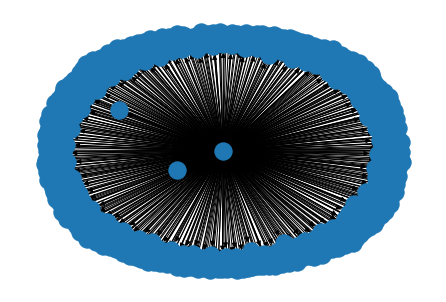

In [397]:
nx.draw(G)

In [398]:
#go to url and add the link to database and network
#link_list = df_1['Link'].tolist()
link_list = df_1.loc[df_1['Link'].str.contains('.onion', regex=False), 'Link'].tolist()
temp_df= pd.DataFrame(columns = ['Link', 'Name']) 
for url in link_list:
    try :
        driver.get(url)
        driver.set_page_load_timeout(5)# seconds
        test = driver.find_elements_by_tag_name('link')
        if test[0].get_attribute('href') == 'https://duckduckgo.com/':
            print(url ,"Page didn't load")
            G.remove_node(url)
            continue
        df_links, G = get_links()
        df = df.append(df_links, ignore_index=True)
        temp_df = temp_df.append(df_links, ignore_index=True)
        print(url, "Is done")
    except :
        print(url ,"Page Error")
        G.remove_node(url)
        continue

df_1 = temp_df
df_1 = df_1.drop_duplicates(ignore_index=True, subset='Link', keep="first")

http://wiki5kauuihowqi5.onion/ Page Error
http://relatecxjngl4qs7.onion/ Page Error
http://pwoah7foa6au2pul.onion/ Page Error
http://wayawaytcl3k66fl.onion/ Page Error
http://easycoinsayj7p5l.onion/ Page Error
http://gurochanocizhuhg.onion/ Page Error
http://6a3nny6zpg23dj7g.onion/ Page Error
http://zmovietoropzaid3.onion/ Page Error
http://iw4xcachep26muba.onion/ Page Error
http://2ogmrlfzdthnwkez.onion/ Page Error
http://satforumtmmmniae.onion/ Page Error
http://jrx7li2ofr4vu5xv.onion/ Page Error
http://dirnxxdraygbifgc.onion/ Page Error
http://traditio3trziwpn.onion/ Page Error
http://alphabaywyjrktqn.onion/ Page Error
http://vmfucmt625257zdp.onion/ Page Error
http://6ll6pemk37fmto6j.onion/ Page Error
http://ev7fnjzjdbtu3miq.onion/ Page Error
http://casesvrcgem4gnb5.onion/ Page Error
http://3dbr5t4pygahedms.onion/ Is done
http://ow24et3tetp6tvmk.onion/ Page Error
http://ocu3errhpxppmwpr.onion/ Page Error
http://valhallaxmn3fydu.onion/ Page Error
http://torlinkbgs6aabns.onion/ Is don

http://hijabhawzxipgzfp.onion/ Page Error
http://vini4koyjgqsxcbp.onion/ Page Error
http://grannytnglrvaaf7.onion/ Page Error
http://zoo6cxl4rtac3jxw.onion/ Page Error
http://solarmovie6rystf.onion/ Page Error
http://tuu66yxvrnn3of7l.onion/ Page Error
http://vp6cnu4cw7fnc4z5.onion/ Page Error
http://ohusanrieoxsxlmh.onion/ Page Error
http://jstashin657bcdxm.onion/ Page Error
http://foggeddriztrcar2.onion/ Page Error
http://fzqnrlcvhkgbdwx5.onion/ Is done
http://ll6lardicrvrljvq.onion/ Is done
http://wi7qkxyrdpu5cmvr.onion/ Page Error
http://kaarvixjxfdy2wv2.onion/ Page Error
http://djypjjvw532evfw3.onion/ Page Error
http://bm26rwk32m7u7rec.onion/ Page Error
http://4cnrrd7lqvfos6xm.onion/ Page Error
http://rutorzzmfflzllk5.onion/ Page Error
http://252r6fywoeoq4fjx.onion/ Page Error
http://blueboxlxc4o7mvk.onion/ Page Error
http://kkkkkkkkkk63ava6.onion/ Page Error
http://torpress2sarn7xw.onion/ Page Error
http://gpostalfauulvzhs.onion/ Page Error
http://fncuwbiisyh6ak3i.onion/ Page Erro

http://garlic7ravilyupx.onion/ Page Error
http://scryptmaildniwm6.onion/ Page Error
http://xfnwyig7olypdq5r.onion/ Page Error
http://danschatjr7qbwip.onion/ Page Error
http://mx7rwxcountermqh.onion/ Page Error
http://outforumbpapnpqr.onion/ Page Error
http://ponieslzi3ivbynd.onion/ Page Error
http://52wdeibt3ivmcapq.onion/ Page Error
http://git3mre26f4myq74.onion/ Page Error
http://silkkit4mj3ctg7g.onion/ Page Error
http://pstatpxhltgzeuwa.onion/ Page Error
http://w7ehkkt2uuxy77bi.onion/ Page Error
http://wpn2yzrbu4mxrq7l.onion/ Page Error
http://twittorxsun563wg.onion/ Page Error
http://mgibojrlzdfoajbn.onion/ Page Error
http://allbaseza3uifcm5.onion/ Page Error
http://pppierreqdmdhrfm.onion/ Page Error
http://2qlvvvnhqyda2ahd.onion/ Page Error
http://x7bwsmcore5fmx56.onion/ Page Error
http://cyberjt6g3lmbrw5.onion/ Page Error
http://lqdnwwwmaouokzmg.onion/ Page Error
http://lolitayx46e76fsa.onion/ Page Error
http://leomarketjdridoo.onion/ Page Error
http://m4hzynbjgypfdqnq.onion/ Pag

http://3w7wu26euuxbcly5.onion/ Page Error
http://auw6fzx756f6gqcd.onion/ Page Error
http://xsold3pvbxt4xblv.onion/ Page Error
http://wirtin67ywc72pjq.onion/ Page Error
http://npdaaf3s3f2xrmlo.onion/ Page Error
http://xlq55tangugwaj4u.onion/ Page Error
http://wis45idjhhbgemez.onion/ Page Error
http://iuektur6bicvfwcq.onion/ Page Error
http://gnvweaoe2xzjqldu.onion/ Page Error
http://netsec7moavvkprc.onion/ Page Error
http://l6quosmt2ffwphvf.onion/ Page Error
http://chloenlpvlemmmmd.onion/ Page Error
http://hxnibog5m2ocjeef.onion/ Page Error
http://ulrn6sryqaifefld.onion/ Is done
http://sipherl2xokvirou.onion/ Page Error
http://yniir5c6cmuwslfl.onion/ Page Error
http://mrreph6wof6xgt43.onion/ Page Error
http://whi7fdjqfahtmsqa.onion/ Page Error
http://4do6yq4iwstidagh.onion/ Page Error
http://cbnujyutccrk267j.onion/ Page Error
http://antonsen4kawlomo.onion/ Page Error
http://fantomwf4luxar7u.onion/ Page Error
http://dongzaarkvs6zs4n.onion/ Page Error
http://qkndirty6fifcrdk.onion/ Page E

In [ ]:
driver.get('http://tuu66yxvrnn3of7l.onion/ ')
driver.set_page_load_timeout(5)# seconds
test = driver.find_elements_by_tag_name('link')
if test[0].get_attribute('href') == 'https://duckduckgo.com/':
    print("Page didn't load")
else:
    print('good')

In [401]:
nx.draw(G)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 375
Number of edges: 502
Average in degree:   1.3387
Average out degree:   1.3387


In [402]:
df_1

,Link,Name
0,http://3dbr5t4pygahedms.onion/,
1,http://torlinkbgs6aabns.onion/,TorLinks
2,http://easycoinsayj7p5l.onion/,EasyCoin
3,http://jzn5w5pac26sqef4.onion/,WeBuyBitcoins
4,http://y3fpieiezy2sin4a.onion/,HQER
...,...,...
379,https://sks-keyservers.net/,
380,https://gnupg.org/,
381,http://www.pgp.com/,
382,https://emailselfdefense.fsf.org/,


In [545]:
#go to url and add the link to database and network
#link_list = df_1['Link'].tolist()
link_list = df_1.loc[df_1['Link'].str.contains('.onion', regex=False), 'Link'].tolist()
link_list.append('http://donionsixbjtiohce24abfgsffo2l4tk26qx464zylumgejukfq2vead.onion/?cat=18&pg=0&lang=en')
temp_df= pd.DataFrame(columns = ['Link', 'Name']) 
for url in link_list:
    try :
        driver.get(url)
        driver.set_page_load_timeout(5)# seconds
        test = driver.find_elements_by_tag_name('link')
        if test[0].get_attribute('href') == 'https://duckduckgo.com/':
            print(url ,"Page didn't load")
            try:
                G.remove_node(url)
                continue
            except:
                continue
        df_links, G = get_links()
        df = df.append(df_links, ignore_index=True)
        temp_df = temp_df.append(df_links, ignore_index=True)
        print(url, "Is done")
    except :
        print(url ,"Page Error")
        try:
            G.remove_node(url)
            continue
        except:
            continue

df_1 = temp_df
df_1 = df_1.drop_duplicates(ignore_index=True, subset='Link', keep="first")

http://parckwartvo7fskp.onion/ Page Error
http://45tbhx5prlejzjgn36nqaxqb6qnm73pbohuvqkpxz2zowh57bxqawkid.onion/ Page Error
http://rougmnvswfsmd4dq.onion/ Page Error
http://expyuzz4wqqyqhjn.onion/ Page Error
http://kfahv6wfkbezjyg4r6mlhpmieydbebr5vkok5r34ya464gqz6c44bnyd.onion/ Page Error
http://donionsixbjtiohce24abfgsffo2l4tk26qx464zylumgejukfq2vead.onion/?cat=18&pg=0&lang=en Page Error


Name: 
Type: DiGraph
Number of nodes: 417
Number of edges: 565
Average in degree:   1.3549
Average out degree:   1.3549


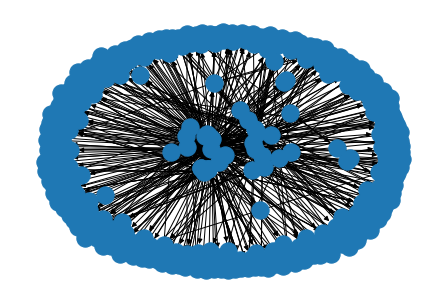

In [494]:
nx.draw(G)
print(nx.info(G))

In [495]:
len(df_1.loc[df_1['Link'].str.contains('.onion', regex=False), 'Link'].tolist())

5

In [496]:
# saving graph created above in gexf format
nx.write_gexf(G, "Tor.gexf")

In [478]:
df_2 = df_1

In [544]:
df_1

,Link,Name
0,https://www.parckwart.de/,www.parckwart.de
1,http://parckwartvo7fskp.onion/,parckwartvo7fskp.onion
2,http://45tbhx5prlejzjgn36nqaxqb6qnm73pbohuvqkp...,(PGP key)
3,http://rougmnvswfsmd4dq.onion/,relays
4,http://expyuzz4wqqyqhjn.onion/,Tor network
5,b''://b''/,
6,https://tools.simplysecure.org/,Want to collaborate? Take this survey!
7,https://www.torproject.org/,Tor
8,https://creativecommons.org/,CC0 no copyright declaration
9,https://donate.torproject.org/,Donate Now


In [484]:
df_2

,Link,Name
0,http://hjadhquqiy4c64apcyex3vkbfxm44shpkdc7e44...,TOR
1,b''://b''/,
2,http://gabucino.hu/,2021-04-27 22:34:56
3,magnet:///,acquire
4,https://koronavirus.gov.hu/,teljes listáját
...,...,...
177,http://www.gnu.org/,software libre
178,https://help.riseup.net/,Riseup VPN
179,http://kfahv6wfkbezjyg4r6mlhpmieydbebr5vkok5r3...,http://kfahv6wfkbezjyg4r6mlhpmieydbebr5vkok5r3...
180,https://tools.simplysecure.org/,Want to collaborate? Take this survey!


In [487]:
df_1 = df_1[~df_1.isin(df_2)].dropna()

In [518]:
F = G.copy()

In [519]:
for n in G.nodes:
    if n.find('.onion') == -1:
        F.remove_node(n)
    else:
        print(n)

http://en35tuzqmn4lofbk.onion/
http://32pbf32xi6ccm63z.onion/
http://underdj5ziov3ic7.onion/
http://psyco42coib33wfl.onion/
http://pms5n4czsmblkcjl.onion/
http://25ffhnaechrbzwf3.onion/
http://jzn5w5pac26sqef4.onion/
http://ozawuyxtechnopol.onion/
http://fzqnrlcvhkgbdwx5.onion/
http://wallstyizjhkrvmj.onion/
http://wywg65dio2lhe76z.onion/
http://konkretzdxpqygow.onion/
http://5qahzzgawtqnrhux.onion/
http://ts4cwattzgsiitv7.onion/
http://l3vv4lvjxgy5i7i2.onion/
http://c6q2m57ts2crvtiz.onion/
http://gexauw6b2azvohdm.onion/
http://ulrn6sryqaifefld.onion/
http://gabufscyjyqr5kj3.onion/
http://jirk5u4osbsr34t5.onion/
http://easycoinsayj7p5l.onion/
http://2ogmrlfzdthnwkez.onion/
http://abbujjh5vqtq77wg.onion/
http://mobil7rab6nuf7vx.onion/
http://germanyhusicaysx.onion/
http://qkj4drtgvpm7eecl.onion/
http://shopsat2dotfotbs.onion/
http://xfnwyig7olypdq5r.onion/
http://kbvbh4kdddiha2ht.onion/
http://s5q54hfww56ov2xc.onion/
http://tuu66yxvrnn3of7l.onion/
http://tfwdi3izigxllure.onion/
http://k

In [527]:
F.remove_edges_from(list(nx.selfloop_edges(F)))